In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

In [34]:
def conv(image, filters, stride=1):
    conv_results = [conv_(image, f, stride) for f in filters]
    
    return np.array(conv_results)

In [35]:
def conv_(image, f, stride=1):
    height = image.shape[0] - f.shape[0] + 1
    width = image.shape[1] - f.shape[1] + 1
    
    conv_result = np.zeros(shape=(height // stride, width // stride))
    
    for h in range(0, height, stride):
        for w in range(0, width, stride):
            window = image[h: h+f.shape[0], w: w+f.shape[1]]
            conv_result[h][w] = np.sum(np.multiply(window, f))
            
    return conv_result

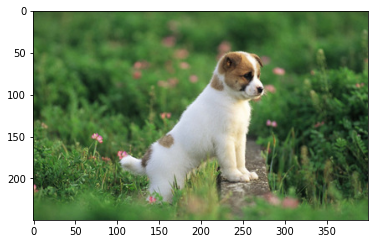

In [76]:
dog = Image.open('dog.jpg')
dog = np.array(dog)
plt.imshow(dog)

In [124]:
f1 = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
f2 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
f3 = np.array([
    [1, 1, 1, 1],
    [0, 0, 0, 0],
    [-1, -1, -1]
])

In [125]:
ic(dog.shape)

ic| dog.shape: (250, 400, 3)


(250, 400, 3)

In [126]:
dog_convs = conv(dog, [f1, f2, f3])
ic(dog_convs.shape)

ic| dog_convs.shape: (3, 248, 398)


(3, 248, 398)

In [127]:
flatten = dog_convs.reshape(1, -1)
outputs = np.matmul(flatten, np.random.random(size=(flatten.shape[1], 5)))
print(outputs)

[[54896152.31591226 54778877.39366392 54766046.07086629 54956008.4188903
  54752643.68484113]]


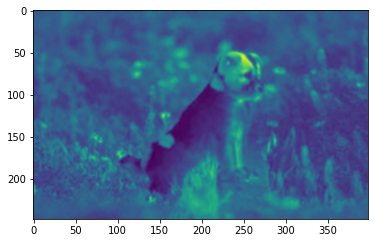

In [128]:
plt.imshow(dog_convs[0])

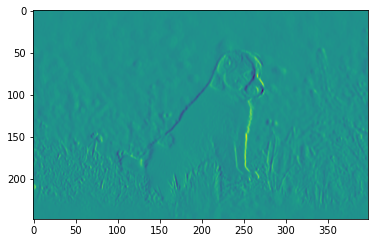

In [129]:
plt.imshow(dog_convs[1])

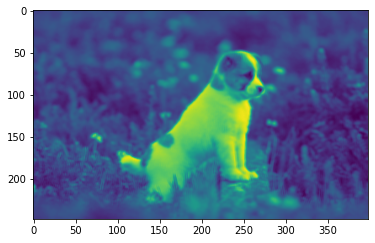

In [130]:
plt.imshow(dog_convs[2])